# 목적

데이터를 crop / interpolation한 다음에 user / scene를 알아볼수 있는 파일명으로 각각 csv파일로 저장

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
from math import pi

In [128]:
def plot(*data, title=None, xlabel=None, ylabel=None, figsize=(16, 4), filename=None):
    dd = []
    ls = []
    for d in data:
        if isinstance(d, str):
            ls.append(d)
        else:
            dd.append(d)
    
    plt.figure(figsize=figsize)
    for d in dd:
        if isinstance(d, tuple):
            if len(d) == 2:
                plt.plot(*d)
            elif len(d) == 3:
                plt.plot(d[:2])
                ax = plt.twinx()
                ax.plot(d[2])
        else:
            plt.plot(d)
    plt.legend(ls)
    
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    
    plt.tight_layout()
    
    if filename is not None:
        plt.savefig(filename)
    
    plt.show()

In [55]:
def norm(data, min=None, max=None):
    if min is None:
        min = 0
    if max is None:
        max = 1
    return (data - data.min()) / (data.max() - data.min()) * (max - min) + min

In [139]:
DATA_DIR = Path('data/org')

In [140]:
CSV_FILENAMES = sorted(list(DATA_DIR.glob('*.csv')))

In [141]:
CSV_FILES = [pd.read_csv(f) for f in CSV_FILENAMES]

In [142]:
CSV_FILES[0].columns

Index(['timestamp', 'biosignal_0', 'biosignal_1', 'biosignal_2', 'biosignal_3',
       'biosignal_4', 'biosignal_5', 'biosignal_6', 'biosignal_7',
       'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_vec_x',
       'angular_vec_y', 'angular_vec_z', 'magnetic_x', 'magnetic_y',
       'magnetic_z', 'input_orientation_x', 'input_orientation_y',
       'input_orientation_z', 'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll',
       'input_projection_left', 'input_projection_top',
       'input_projection_right', 'input_projection_bottom', 'prediction_time',
       'predicted_orientation_x', 'predicted_orientation_y',
       'predicted_orientation_z', 'predicted_orientation_w',
       'predicted_orientation_yaw', 'predicted_orientation_pitch',
       'predicted_orientation_roll', 'predicted_projection_left',
       'predicted_projection_top', 'predicted_projection_right',
       'predicted_projection_bottom'],
      d

In [143]:
COLUMNS = ['timestamp', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [144]:
CSV_FILES = [csv[COLUMNS] for csv in CSV_FILES]

In [145]:
for csv in CSV_FILES:
    csv.timestamp /= 705600000
    csv.timestamp -= csv.timestamp[0]

In [146]:
for csv in CSV_FILES:
    csv.input_orientation_yaw *= 180 / pi
    csv.input_orientation_pitch *= 180 / pi
    csv.input_orientation_roll *= 180 / pi

`705600000 = 1s`

그러므로 `705600 = 1ms`


In [147]:
csv

,timestamp,acceleration_x,acceleration_y,acceleration_z,input_orientation_yaw,input_orientation_pitch,input_orientation_roll
0,0.000000,-0.069434,9.589070,-1.113338,-3.629473,7.595386,-1.410510
1,0.018108,-0.069434,9.601042,-1.101366,-3.595889,7.475031,-1.411981
2,0.033547,-0.064645,9.622590,-1.087001,-3.539358,7.446354,-1.346180
3,0.050246,-0.045491,9.677659,-1.113338,-3.481707,7.329539,-1.311496
4,0.067873,-0.035914,9.720756,-1.072635,-3.452480,7.273142,-1.294892
...,...,...,...,...,...,...,...
19845,582.650740,-0.016760,9.761458,-0.529135,-1.018193,3.928019,-1.908800
19846,582.669348,-0.131685,9.799767,-0.514769,-1.168380,3.917410,-1.962520
19847,582.684331,-0.162811,9.818921,-0.495615,-1.254902,3.890114,-2.038934
19848,582.701150,-0.284919,9.806950,-0.462095,-1.285986,3.847799,-2.102169


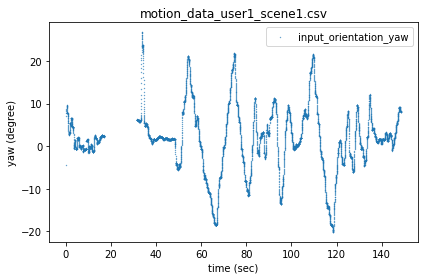

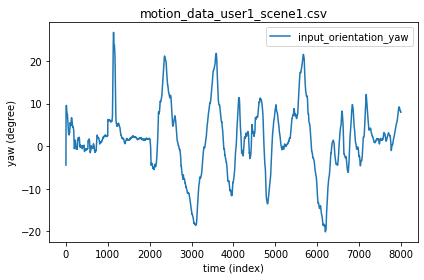

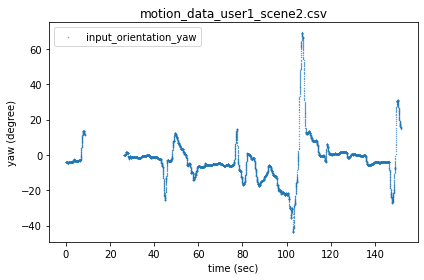

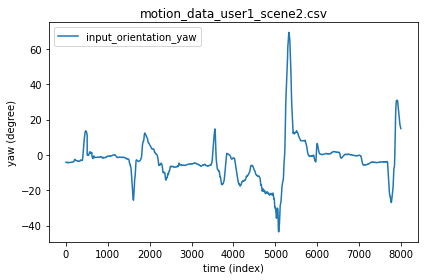

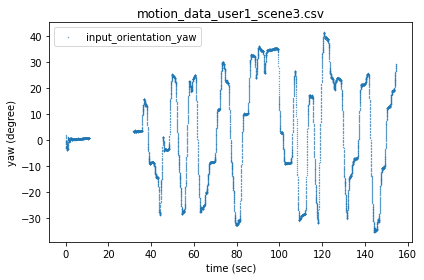

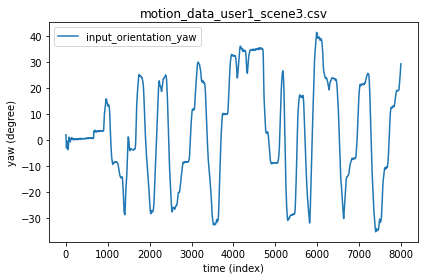

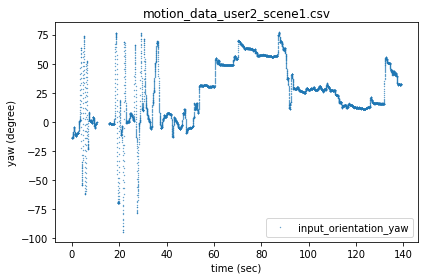

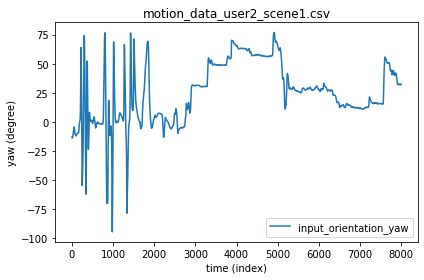

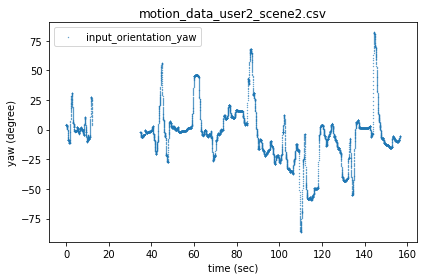

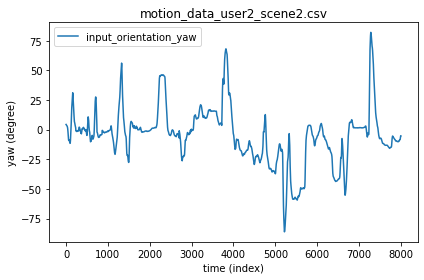

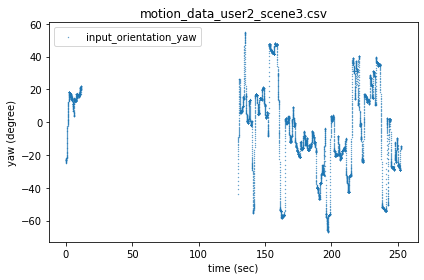

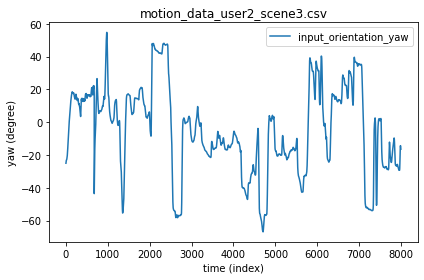

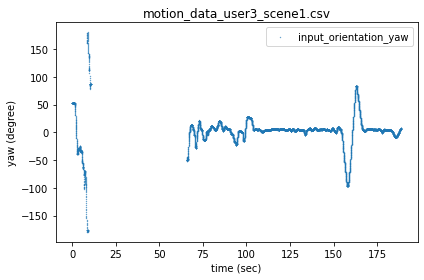

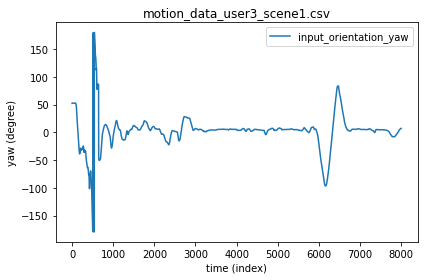

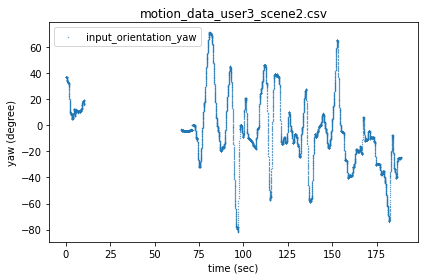

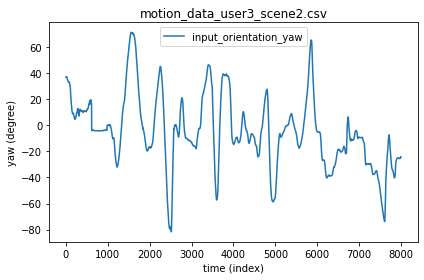

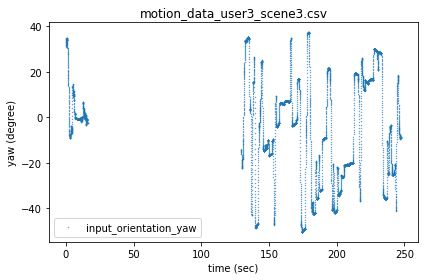

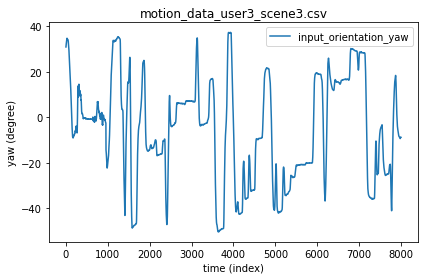

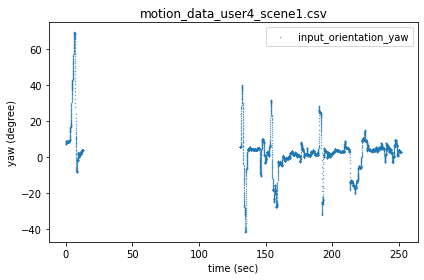

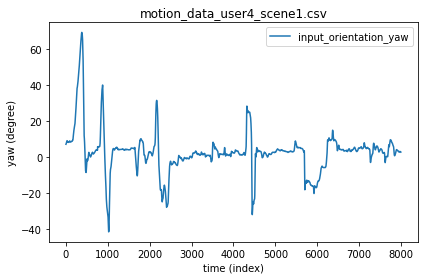

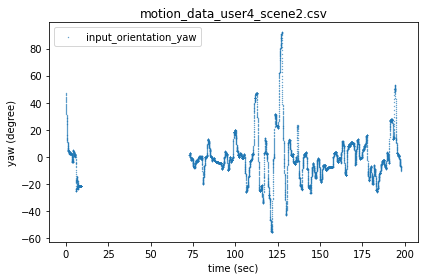

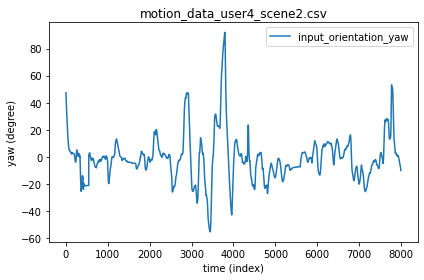

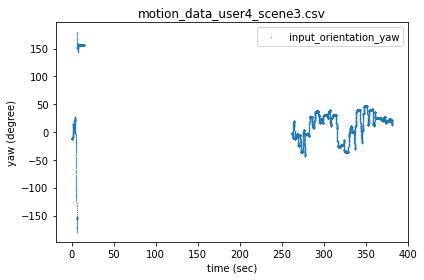

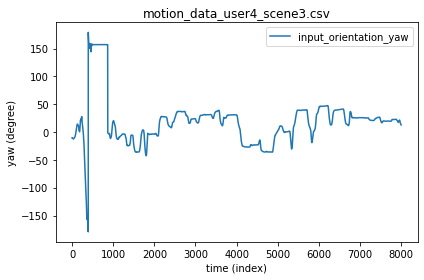

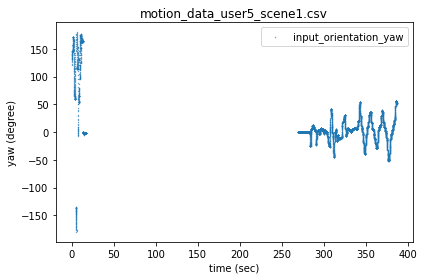

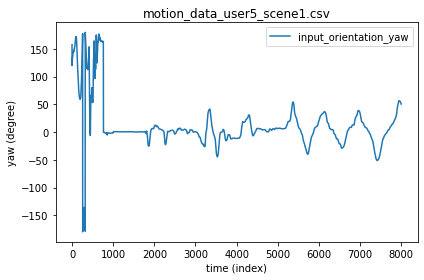

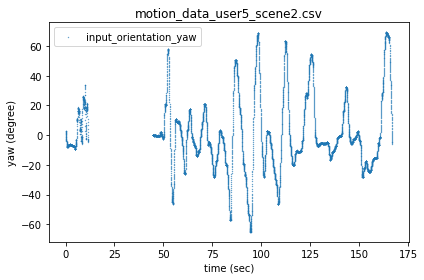

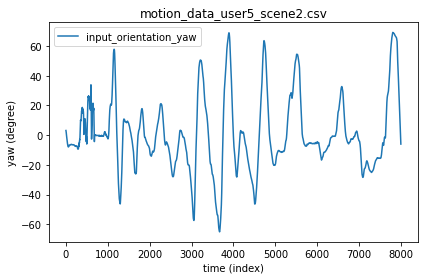

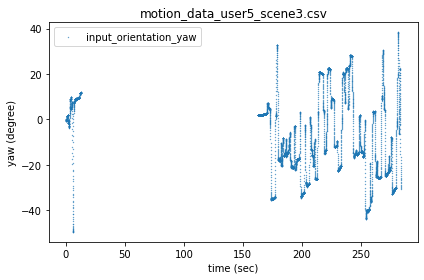

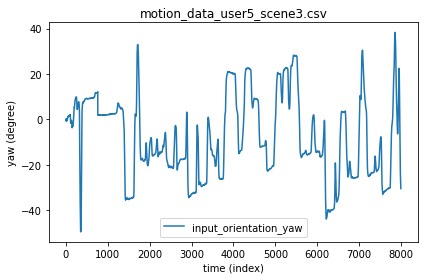

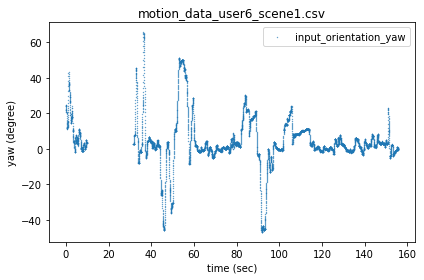

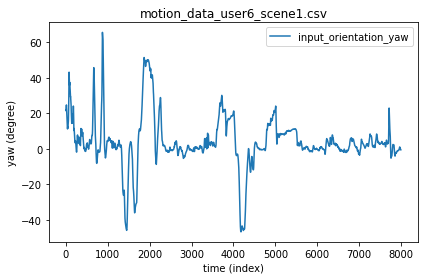

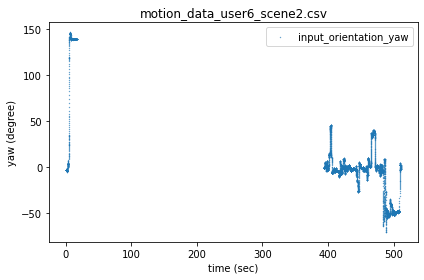

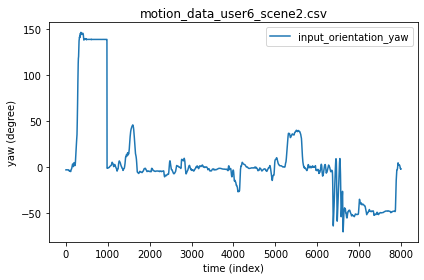

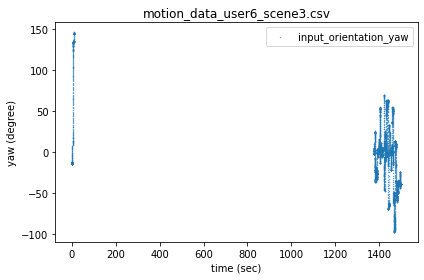

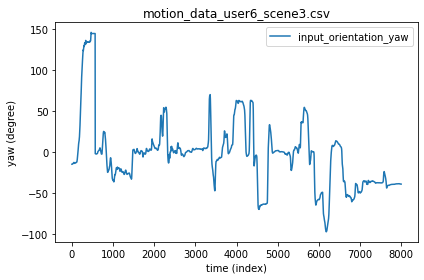

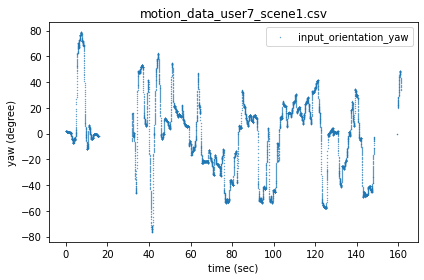

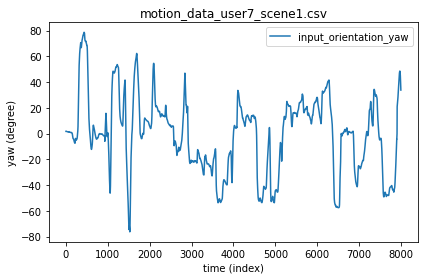

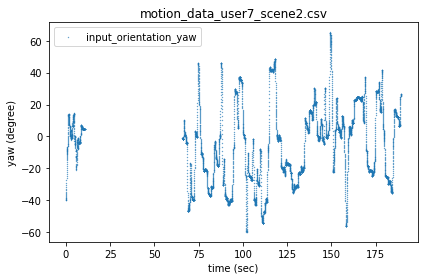

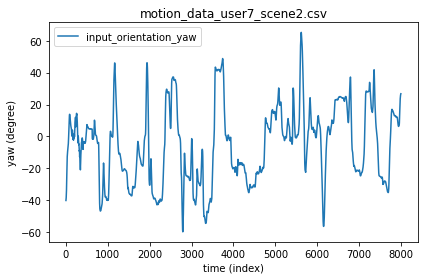

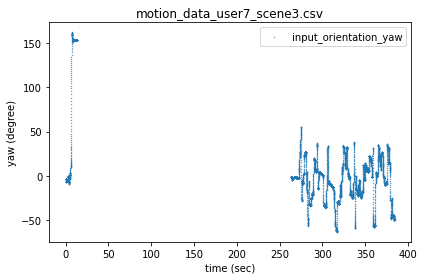

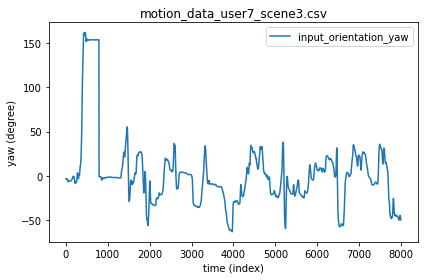

In [149]:
S = 0
T = 8000
figsize = (6, 4)
for i in range(len(CSV_FILENAMES)):
    csv = CSV_FILES[i]
    max = csv.input_orientation_yaw[S:T].max()
    min = csv.input_orientation_yaw[S:T].min()
    
    plt.figure(figsize=figsize)
    plt.scatter(csv.timestamp[S:T], csv.input_orientation_yaw[S:T], s=0.1)
    plt.legend(['input_orientation_yaw'])
    plt.xlabel('time (sec)')
    plt.ylabel('yaw (degree)')
    plt.title(CSV_FILENAMES[i].name)
    plt.savefig(f'img/{CSV_FILENAMES[i].stem}.png')
    plt.tight_layout()
    plt.show()
    
    plot((csv.timestamp[S:T].index, csv.input_orientation_yaw[S:T]),
         'input_orientation_yaw', 
         xlabel='time (index)', ylabel='yaw (degree)',
         title=CSV_FILENAMES[i].name, 
         figsize=figsize,
         filename=f'img/{CSV_FILENAMES[i].stem}_t.png')
    print('===============================================================')

<AxesSubplot:label='5d168c3a-df2b-444f-9e6f-14241359c25a'>

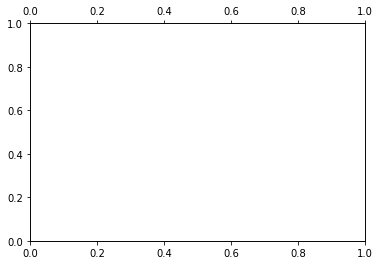

In [88]:
plt.twiny()